In [3]:
import xarray as xr

# 请根据实际路径修改下面的文件名
fn = "cmems_obs-sst_glo_phy_nrt_l4_P1D-m_1749202248617.nc"
ds = xr.open_dataset(fn)

# 查看数据集的整体结构
print(ds)



<xarray.Dataset> Size: 5MB
Dimensions:       (time: 1461, latitude: 25, longitude: 32)
Coordinates:
  * time          (time) datetime64[ns] 12kB 2021-01-01 ... 2024-12-31
  * latitude      (latitude) float32 100B 37.35 37.45 37.55 ... 39.65 39.75
  * longitude     (longitude) float32 128B 118.4 118.5 118.7 ... 121.4 121.5
Data variables:
    analysed_sst  (time, latitude, longitude) float32 5MB ...
Attributes:
    Conventions:       CF-1.11
    title:             ODYSSEA Global Sea Surface Temperature Gridded Level 4...
    institution:       Institut Francais de Recherche pour l'Exploitation de ...
    source:            Odyssea L4 processor
    history:           Optimally interpolated SST originally produced by Ifre...
    contact:           emmanuelle.autret@ifremer.fr;jfpiolle@ifremer.fr
    references:        Product User Manual for L4 Odyssea Product over the Gl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_PHY

In [4]:
# 查看各维度大小
print("Dimensions:", ds.dims)  

# 查看时间维的起止和步长（经常以 pandas.DatetimeIndex 形式出现）
print("Time range:", ds.time.values[0], "to", ds.time.values[-1])
print("Time step:", (ds.time.values[1] - ds.time.values[0]))


Dimensions: FrozenMappingWarningOnValuesAccess({'time': 1461, 'latitude': 25, 'longitude': 32})
Time range: 2021-01-01T00:00:00.000000000 to 2024-12-31T00:00:00.000000000
Time step: 86400000000000 nanoseconds


# 预处理


In [5]:
import torch 
print(torch.cuda.is_available())

True


Text(0, 0.5, 'SST (°C)')

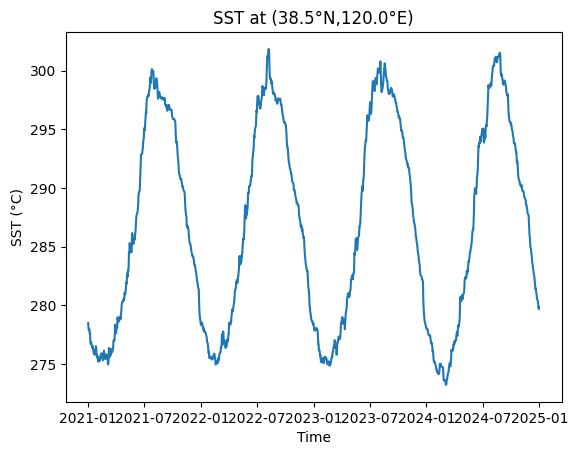

In [6]:
from matplotlib import pyplot as plt

# 取某一经纬度点
sst_point = ds['analysed_sst'].sel(latitude=38.5, longitude=120.0, method='nearest')
plt.figure()
plt.plot(sst_point.time, sst_point)
plt.title('SST at (38.5°N,120.0°E)')
plt.xlabel('Time'); plt.ylabel('SST (°C)')


In [8]:
!pip install ace_tools

In [7]:
import xarray as xr
import pandas as pd
from IPython.display import display

sst_snapshot = ds['analysed_sst'].sel(time='2024-12-31')

# 2. 转为 DataFrame
df_snapshot = sst_snapshot.to_pandas()

# 3. 在 notebook 里直接展示
display(df_snapshot)

longitude,118.449997,118.549995,118.650002,118.750000,118.849998,118.949997,119.049995,119.150002,119.250000,119.349998,...,120.650002,120.750000,120.849998,120.949997,121.049995,121.150002,121.250000,121.349998,121.449997,121.549995
latitude,,,,,,,,,,,,,,,,,,,,,
37.349998,NaN,NaN,NaN,NaN,NaN,NaN,274.799988,274.980011,275.320007,275.679993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37.449997,NaN,NaN,NaN,NaN,NaN,NaN,274.750000,274.980011,275.440002,275.950012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.839996
37.549999,NaN,NaN,NaN,NaN,NaN,NaN,274.630005,274.880005,275.450012,276.059998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.149994,278.119995
37.649998,NaN,NaN,NaN,NaN,NaN,NaN,274.510010,274.779999,275.480011,276.179993,...,NaN,NaN,NaN,NaN,NaN,NaN,278.440002,278.600006,278.799988,278.940002
37.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.079987,275.730011,276.399994,...,NaN,NaN,NaN,NaN,278.670013,278.839996,279.079987,279.399994,279.739990,279.980011
37.849998,NaN,NaN,NaN,NaN,NaN,NaN,275.929993,275.950012,276.290009,276.750000,...,278.269989,278.529999,278.750000,278.940002,279.179993,279.519989,279.899994,280.290009,280.640015,280.869995
37.949997,NaN,NaN,NaN,NaN,NaN,NaN,276.519989,276.619995,276.869995,277.230011,...,278.709991,278.970001,279.339996,279.739990,280.119995,280.470001,280.790009,281.079987,281.320007,281.480011
38.049999,NaN,NaN,NaN,NaN,NaN,NaN,276.890015,277.109985,277.440002,277.809998,...,279.429993,279.779999,280.239990,280.679993,281.029999,281.279999,281.459991,281.630005,281.760010,281.859985
38.149998,276.170013,276.130005,276.350006,NaN,276.980011,277.140015,277.369995,277.679993,278.049988,278.399994,...,280.239990,280.649994,281.079987,281.450012,281.690002,281.829987,281.899994,281.959991,282.019989,282.079987


In [9]:
sst = ds['analysed_sst']
# 2. 判断哪些格点在整个时间序列中始终为缺失（陆地）
land_mask = sst.isnull().all(dim='time')  
# land_mask: (latitude, longitude) 的布尔型 DataArray

# 3. 转成 Pandas DataFrame 并展示（表格中 True 即为陆地格点）
df_land = land_mask.to_pandas()
display(df_land)

# 4. 统计陆地格点数量及占比
n_land = int(df_land.values.sum())          # True 的数量
n_total = df_land.size                      # 总格点数
print(f"陆地格点数: {n_land}，总格点数: {n_total}，占比: {n_land/n_total:.2%}")

longitude,118.449997,118.549995,118.650002,118.750000,118.849998,118.949997,119.049995,119.150002,119.250000,119.349998,...,120.650002,120.750000,120.849998,120.949997,121.049995,121.150002,121.250000,121.349998,121.449997,121.549995
latitude,,,,,,,,,,,,,,,,,,,,,
37.349998,True,True,True,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
37.449997,True,True,True,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
37.549999,True,True,True,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
37.649998,True,True,True,True,True,True,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
37.750000,True,True,True,True,True,True,True,False,False,False,...,True,True,True,True,False,False,False,False,False,False
37.849998,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37.949997,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38.049999,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38.149998,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


陆地格点数: 183，总格点数: 800，占比: 22.88%
